In [57]:
pip install matplotlib scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [58]:
import matplotlib.pyplot as plt
import numpy as np
import csv
from collections import Counter, defaultdict
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

In [59]:
# Function to read .csv database and convert to variables.
def read_csv():
    x = []
    y = []
    z = []
    players = []
    z_label = "High Score"
    y_label = "Score"
    x_label = "Tournaments Topped"
    with open('../players.csv', encoding='utf-8') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        header = 0
        for row in reader:
            if header == 0:
                header +=1
            else:
                if row[1] == '0':
                    print('Only DQs: ', row[0])
                else:
                    z.append(round(float(row[8]), 2))
                    y.append(round(float(row[6]), 2))
                    x.append(round(float(row[3]), 2))
                    players.append([row[0], round(float(row[6]), 2)])
    return x, y, z, x_label, y_label, z_label, players

In [60]:
# Assign values to variables

x, y, z, x_label, y_label, z_label, players = read_csv()

Only DQs:  Jisus-o
Only DQs:  CCS1412six
Only DQs:  MarioCAMF
Only DQs:  Jara
Only DQs:  Nalga
Only DQs:  Manzano
Only DQs:  Betta


In [61]:
# Convert (x,y,z) to a triplet array structure

X = np.vstack((x, y, z)).T

In [62]:
# Print header of array

X

array([[2.00000e+00, 1.59509e+03, 1.97931e+03],
       [2.00000e+00, 1.40225e+03, 1.76240e+03],
       [1.00000e+00, 1.48826e+03, 1.89998e+03],
       [5.00000e+00, 1.57576e+03, 1.73903e+03],
       [6.00000e+00, 1.73699e+03, 1.96429e+03],
       [1.00000e+00, 1.30095e+03, 1.74720e+03],
       [1.00000e+01, 1.71916e+03, 1.75609e+03],
       [1.00000e+00, 1.45966e+03, 2.06460e+03],
       [8.00000e+00, 1.68096e+03, 1.69162e+03],
       [1.00000e+00, 1.43529e+03, 1.59984e+03],
       [5.00000e+00, 1.59308e+03, 1.63479e+03],
       [1.00000e+00, 1.27124e+03, 1.74720e+03],
       [1.00000e+00, 1.52719e+03, 1.81866e+03],
       [7.00000e+00, 1.62770e+03, 1.75743e+03],
       [0.00000e+00, 1.19960e+03, 1.88118e+03],
       [0.00000e+00, 1.32526e+03, 1.74720e+03],
       [0.00000e+00, 1.41859e+03, 1.44612e+03],
       [0.00000e+00, 1.15299e+03, 1.74720e+03],
       [2.00000e+00, 1.47480e+03, 1.74720e+03],
       [2.00000e+00, 1.53651e+03, 1.67018e+03],
       [2.00000e+00, 1.50919e+03, 1.5580

/var/folders/d4/3vrc8t2d78jgqwdqzclrbwd40000gn/T/ipykernel_20018/862906256.py:14: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = 10


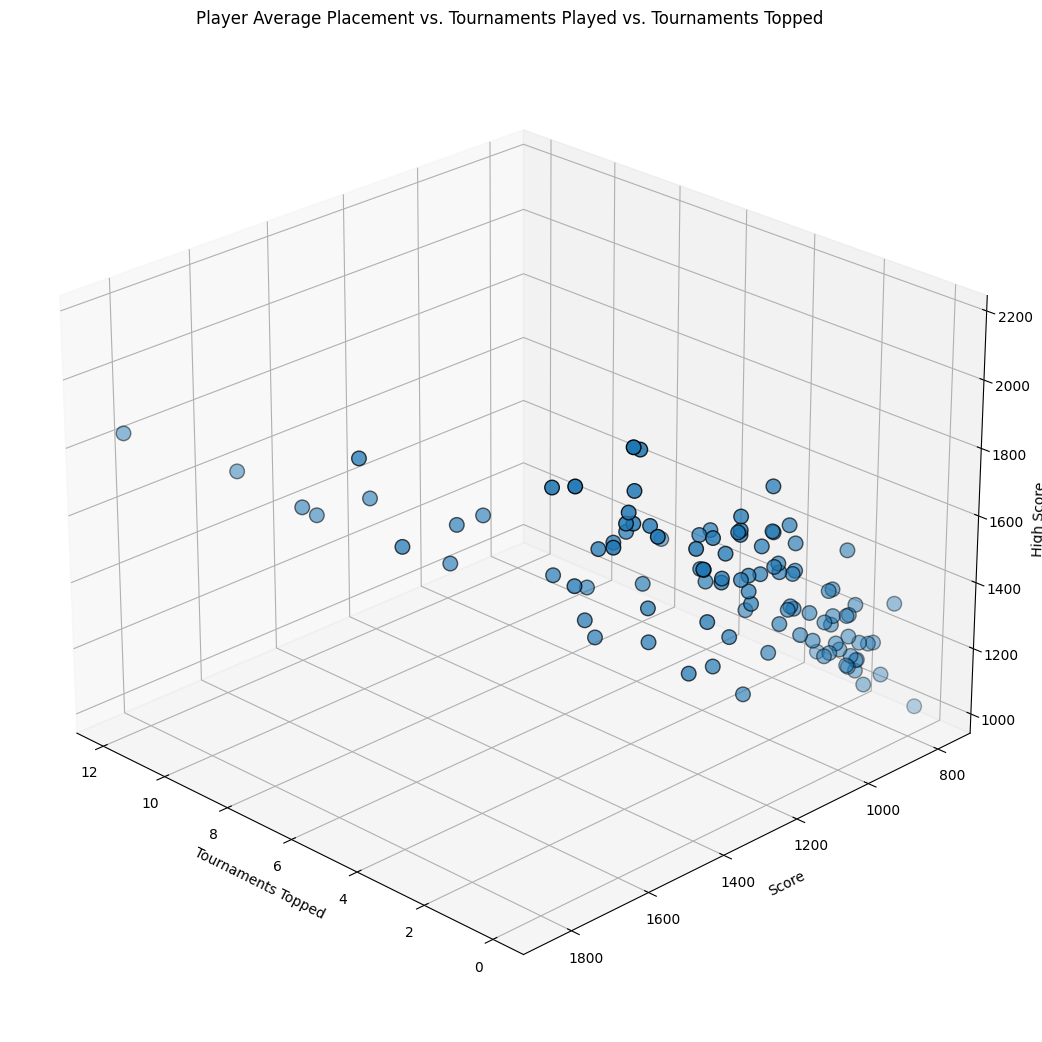

In [63]:
# Draw unclustered graph

# Configure plot
fig = plt.figure(1, figsize=(10, 10))
ax = Axes3D(fig, rect=[1, 1, 1, 1], elev=25, azim=135, auto_add_to_figure=False)
fig.add_axes(ax)

# Add information to plot
ax.scatter(X[:, 0], X[:, 1], X[:, 2], edgecolor="k", s=110)
ax.set_xlabel(x_label)
ax.set_ylabel(y_label)
ax.set_zlabel(z_label)
ax.set_title("Player Average Placement vs. Tournaments Played vs. Tournaments Topped")
ax.dist = 10

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/d4/3vrc8t2d78jgqwdqzclrbwd40000gn/T/ipykernel_20018/2476546178.py:19: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = 10


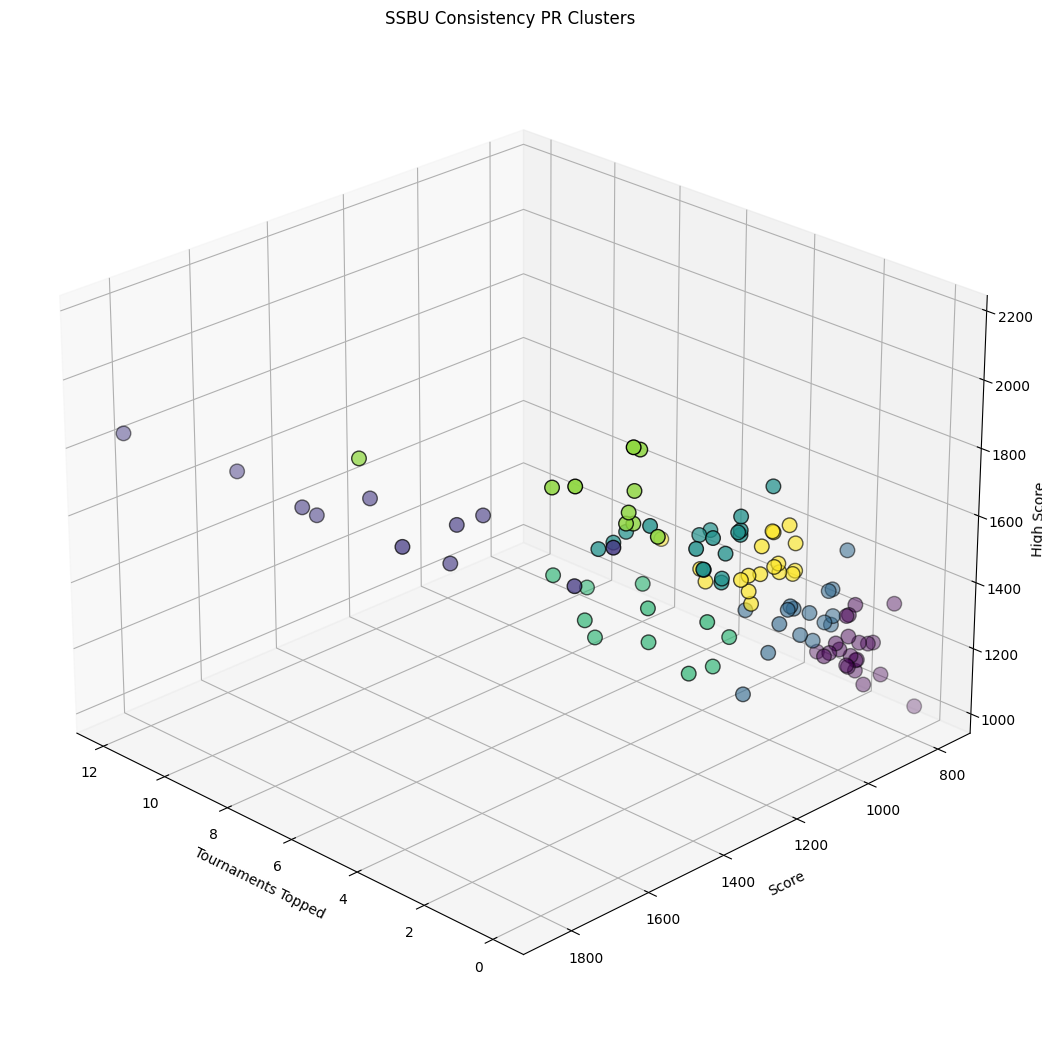

In [64]:
# Define amount of clusters (tiers)
est = KMeans(n_clusters=7)

# Configure plot
fig = plt.figure(1, figsize=(10, 10))
ax = Axes3D(fig, rect=[1, 1, 1, 1], elev=25, azim=135, auto_add_to_figure=False)
fig.add_axes(ax)

# Run K-Means Clustering
est.fit(X)
labels = est.labels_

# Add information to plot
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels.astype(float), edgecolor="k", s=110)
ax.set_xlabel(x_label)
ax.set_ylabel(y_label)
ax.set_zlabel(z_label)
ax.set_title("SSBU Consistency PR Clusters")
ax.dist = 10

In [65]:
# Prepare each tier

tiers = {}
n = 0
for item in labels:
    if item in tiers:
        tiers[item].append(players[n])
    else:
        tiers[item] = [players[n]]
    n +=1

In [66]:
# Print out all tiers

tiersObjects = []
n = 0

for i in range(7):
    tierScore = 0
    playerCount = 0
    playersArray = []
    for player in tiers[i]:
        tierScore += player[1]
        playerCount += 1
        playersArray.append(player)
        n+=1
    tiersObjects.append({
        'number': i,
        'avgScore': tierScore / playerCount,
        'players': playersArray
    })

for tier in tiersObjects:
    print(tier)

for obj in players:
    for tier in tiersObjects:
        if obj in tier['players']:
            obj.append(tier['number'])
            break

for p in players:
    print(p)

{'number': 0, 'avgScore': 955.7877272727275, 'players': [['TG Zorlack', 987.36], ['YoGar', 980.91], ['armando nc', 954.3], ['JCX', 957.91], ['Kiks', 968.58], ['Kamikrazy', 949.44], ['Thoha', 851.42], ['Nuri.-.xD', 909.37], ['OldCat', 984.5], ['patho_pain', 980.52], ['AlanCb', 1004.94], ['Demetrio', 979.58], ['ATCJ', 884.87], ['Croissant', 924.12], ['Swagandorf', 963.2], ['Basht', 783.17], ['Deme', 933.89], ['Mewrolf', 1015.73], ['SC Bon Clay', 959.06], ['Core', 1033.46], ['Spear', 972.8], ['Kavant', 1048.2]]}
{'number': 1, 'avgScore': 1640.3863636363637, 'players': [['Nightcore', 1575.76], ['CHOSEN', 1719.16], ['Zeref', 1680.96], ['Bet.', 1593.08], ['IV', 1527.19], ['Masteroscar', 1627.7], ['Chriss', 1536.51], ['Chazz', 1717.35], ['CharlesPunk', 1507.83], ['Pineda', 1844.31], ['frijolito', 1714.4]]}
{'number': 2, 'avgScore': 1107.049375, 'players': [['LCA I RenRen', 1026.09], ['Racc-Kun', 990.12], ['Germen', 1271.05], ['Sorensic', 1204.11], ['Mixman', 1171.99], ['Aquiles', 1136.47], ['